In [12]:
import sys
sys.path.append('../')

In [13]:
%load_ext autoreload
%autoreload 2
from relation import Scaling

In [28]:
s = Scaling('140','')

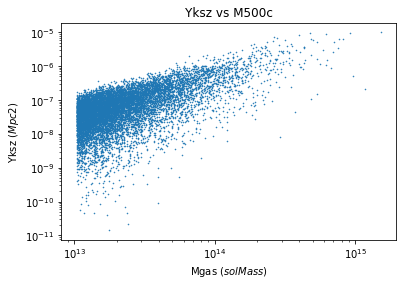

In [33]:
s.Y_M()

In [27]:
s.Yksz()

array([9.94326070e-06, 9.82565098e-06, 2.15442249e-07, ...,
       1.47195907e-08, 5.12151921e-08, 5.98059194e-08])

In [1]:
import astropy.constants as c

In [3]:
c.c.to('cm/s')

<Quantity 2.99792458e+10 cm / s>

In [31]:
c.c.unit

Unit("m / s")

In [10]:
f.to('cm s')

<Quantity 2.21902138e-35 cm s>

In [11]:
f

<Quantity 2.21902138e-37 m s>

In [20]:
c.m_p

[autoreload of relation failed: Traceback (most recent call last):
  File "/home/anto/Softwares/anaconda3/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/anto/Softwares/anaconda3/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/home/anto/Softwares/anaconda3/lib/python3.8/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/anto/Softwares/anaconda3/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 779, in exec_module
  File "<frozen importlib._bootstrap_external>", line 916, in get_code
  File "<frozen importlib._bootstrap_external>", line 846, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  

<<class 'astropy.constants.codata2018.CODATA2018'> name='Proton mass' value=1.67262192369e-27 uncertainty=5.1e-37 unit='kg' reference='CODATA 2018'>